In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import math
from sklearn import linear_model
import statsmodels.api as sm  ### to use R-style
import statsmodels.formula.api as smf 




import datetime
import sys
sys.version

/Users/melissatufan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


'3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [2]:
data_folder = Path("../data")
data_file = data_folder / "raw_data.csv"
raw_df = pd.read_csv(data_file)
working_df = raw_df.dropna(subset=['Location','amount_used'])
working_df = working_df[working_df['is_suspicious'] == 0]

def week_num(date_string):
    date = datetime.datetime.strptime(date_string,'%m/%d/%y')
    return datetime.date.isocalendar(date)[1]

working_df['week_number'] = working_df['Date'].apply(week_num)

In [3]:
working_df.head()

### create numeric mapping for locations
unique_locs = working_df.Location.value_counts().index.tolist()
loc_map = [x for x in range(len(unique_locs))]
loc_set = dict(zip(unique_locs, loc_map))
#loc_set

working_df['numeric_location'] = working_df['Location'].map(lambda x: loc_set[x] if x in loc_set.keys() else -1)

### create numeric mapping for locations
unique_locs = working_df.Location.value_counts().index.tolist()
loc_map = [x for x in range(len(unique_locs))]
loc_set = dict(zip(unique_locs, loc_map))
#loc_set

working_df['numeric_location'] = working_df['Location'].map(lambda x: loc_set[x] if x in loc_set.keys() else -1)


working_df['location_0'] = working_df['numeric_location'].map(lambda x: 1 if x == 0 else 0)
working_df['location_1'] = working_df['numeric_location'].map(lambda x: 1 if x == 1 else 0)
working_df['location_2'] = working_df['numeric_location'].map(lambda x: 1 if x == 2 else 0)
working_df['location_3'] = working_df['numeric_location'].map(lambda x: 1 if x == 3 else 0)
working_df['location_4'] = working_df['numeric_location'].map(lambda x: 1 if x == 4 else 0)
working_df['location_5'] = working_df['numeric_location'].map(lambda x: 1 if x == 5 else 0)
working_df['location_6'] = working_df['numeric_location'].map(lambda x: 1 if x == 6 else 0)
working_df['location_7'] = working_df['numeric_location'].map(lambda x: 1 if x == 7 else 0)
working_df['location_8'] = working_df['numeric_location'].map(lambda x: 1 if x == 8 else 0)
working_df['location_9'] = working_df['numeric_location'].map(lambda x: 1 if x == 9 else 0)
working_df['location_10'] = working_df['numeric_location'].map(lambda x: 1 if x == 10 else 0)

working_df.loc[:,'numeric_location':]

,numeric_location,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,location_10
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = working_df['amount_used'].values
x_ = working_df['Treatment'].values
x = sm.tools.add_constant(x_)


ols_1 = sm.OLS(Y, x).fit() 
ols_1.summary()

                         

                                                         

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.329
Date:                Sun, 15 Apr 2018   Prob (F-statistic):             0.0220
Time:                        12:54:37   Log-Likelihood:                -704.34
No. Observations:                 201   AIC:                             1413.
Df Residuals:                     199   BIC:                             1419.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5039      0.712      9.135      0.000       5.100       7.908
x1             2.7461      1.190      2.308      0.022       0.400       5.092
==============================================================================
Omnibus:                      140.415   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1251.550
Skew:                           2.646   Prob(JB):                    1.70e-272
Kurtosis:                      14.020   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
ols_2 = sm.OLS(Y, x).fit(cov_type='cluster',cov_kwds={'groups': [working_df['numeric_location'],working_df['week_number']]}, use_t=True)
ols_2.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.750
Date:                Sun, 15 Apr 2018   Prob (F-statistic):             0.0618
Time:                        12:54:37   Log-Likelihood:                -704.34
No. Observations:                 201   AIC:                             1413.
Df Residuals:                     199   BIC:                             1419.
Df Model:                           1                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5039      1.519      4.280      0.008       2.598      10.410
x1             2.7461      1.145      2.398      0.062      -0.198       5.690
==============================================================================
Omnibus:                      140.415   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1251.550
Skew:                           2.646   Prob(JB):                    1.70e-272
Kurtosis:                      14.020   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
"""

In [6]:
model_f = 'amount_used ~ Treatment + \
                 location_0 + location_1 + location_2 + location_3 + location_4 + \
                 location_5 + location_6 + location_7 + location_8 + location_9 + \
                 location_10'
model = smf.ols(formula=model_f, data=working_df)
model_fit = model.fit(cov_type='cluster',cov_kwds={'groups': [working_df['week_number']]}, use_t=True)
model_fit.summary()

#def fit_summarize(model, formula, data, cov_type, cov_kwds):
#    model_fit = model.fit(cov_type=cov_type, cov_kwds= )



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                 8.621e+15
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           5.72e-40
Time:                        12:54:37   Log-Likelihood:                -666.39
No. Observations:                 201   AIC:                             1357.
Df Residuals:                     189   BIC:                             1396.
Df Model:                          11                                         
Covariance Type:              cluster                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5603      0.785      8.362      0.000       4.544       8.577
Treatment       1.0755      0.875      1.229      0.274      -1.173       3.324
location_0      4.0779      0.715      5.700      0.002       2.239       5.917
location_1     -6.0557      0.784     -7.725      0.001      -8.071      -4.041
location_2     -0.6791      1.204     -0.564      0.597      -3.774       2.415
location_3      7.2520      1.895      3.827      0.012       2.380      12.124
location_4      3.2093      1.581      2.031      0.098      -0.854       7.272
location_5      1.2093      1.991      0.607      0.570      -3.908       6.327
location_6     -4.4559      1.127     -3.952      0.011      -7.354      -1.558
location_7     -4.7723      0.193    -24.716      0.000      -5.269      -4.276
location_8     -0.7339      1.601     -0.458      0.666      -4.849       3.381
location_9      7.3378      1.334      5.501      0.003       3.909      10.767
location_10     0.1709      1.532      0.112      0.916      -3.768       4.109
==============================================================================
Omnibus:                      185.157   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3891.274
Skew:                           3.475   Prob(JB):                         0.00
Kurtosis:                      23.404   Cond. No.                     8.25e+15
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
[2] The smallest eigenvalue is 3.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [7]:
import matplotlib as mpl
import seaborn as sns

sns.set(color_codes=True)




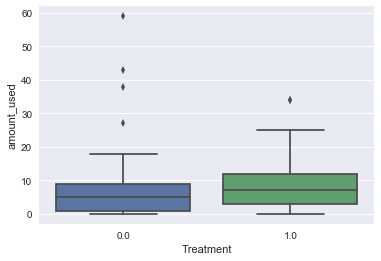

In [8]:
#sns.lmplot(x="Treatment", y="amount_used",   data=working_df)

sns.boxplot(x="Treatment", y="amount_used",   data=working_df)
